In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [3]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [4]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [5]:
team_1 = 'Kings XI Punjab'
team_2 = 'Delhi Capitals'
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(lambda x: x if x==team_1 else (x if x==team_2 else "Others"))


# Winning Probability of Teams

Text(0.5, 1.0, 'DC Total Runs Score Stats')

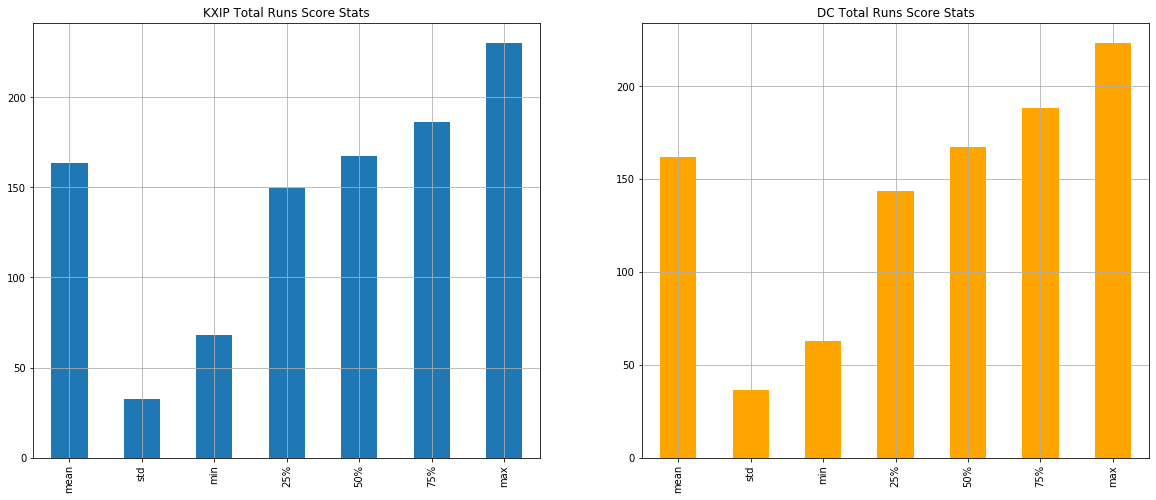

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs'].describe()[1:].plot(ax=ax[0], kind='bar', grid=True)
delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs'].describe()[1:].plot(ax=ax[1], kind='bar', color='orange', grid=True)
ax[0].set_title("KXIP Total Runs Score Stats")
ax[1].set_title("DC Total Runs Score Stats")

As both the teams score stats are almost equal in values and performances are almost at par with each other, we have to also consider the present scenario. As DC is performing well as compared to KXIP in winning and in points table, the probability of winnning of DC is high.

# KL Rahul Strike Rate in powerplay

In [7]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

In [8]:
kl_rahul = delivery[(delivery['batsman']=='KL Rahul') & (delivery['over']<=6)]
strike_rate = list()
match_ids_ = list()
balls_faced = list()
bat_runs = list()
for match_id in kl_rahul.match_id.unique():
    balls = 0
    runs = 0
    for run in kl_rahul[kl_rahul['match_id']==match_id]['batsman_runs']:
        balls += 1 
        runs += run
    if (runs*100/balls) < 250:
        balls_faced.append(balls)
        bat_runs.append(runs)
        match_ids_.append(match_id)    
        strike_rate.append(runs*100/balls)
    

In [9]:
kl_rahul_sr = pd.DataFrame(index=match_ids_, data={'Strike Rate':strike_rate, 'Runs Scored':bat_runs,'Balls Played': balls_faced})
kl_rahul_sr.describe()

,Strike Rate,Runs Scored,Balls Played
count,34.000000,34.000000,34.000000
mean,115.440611,18.441176,14.647059
std,54.325472,10.871679,5.819936
min,0.000000,0.000000,1.000000
25%,79.326923,9.250000,11.250000
50%,117.647059,20.000000,15.000000
75%,160.208333,26.750000,17.750000
max,200.000000,39.000000,27.000000


Text(0, 0.5, 'Frequency')

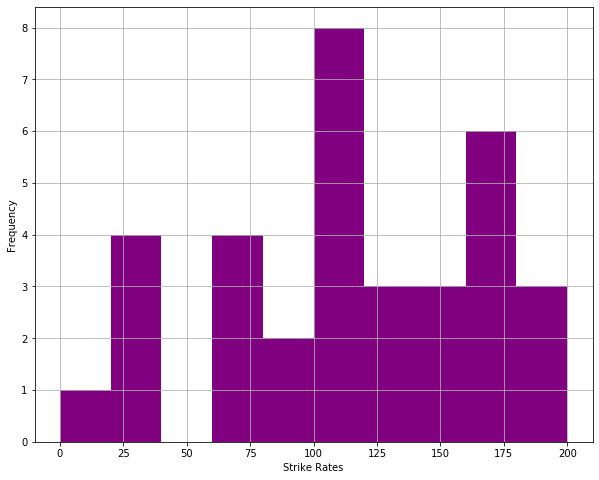

In [10]:
kl_rahul_sr['Strike Rate'].hist(figsize=(10,8), color='purple')
plt.xlabel('Strike Rates')
plt.ylabel("Frequency")

Since, the frequency around the mean and median value is more, KL Rahul's strike rate in powerplay will be more than 110 but less than 121.

# Shreyas Iyer's Contribution in DC's Total Score

In [11]:
iyer_matches = delivery[(delivery['batsman']== 'SS Iyer')]
iyer_group = iyer_matches.groupby('match_id').sum()
dc_matches = delivery[(delivery['batting_team']==team_2)].groupby('match_id').sum().reset_index()

In [12]:
dc_match_score_iyer = dc_matches[dc_matches['match_id'].apply(lambda x: True if x in iyer_group.index else False)]
dc_match_score_iyer.set_index('match_id', inplace=True)

In [21]:
iyer_in_dc = pd.DataFrame(index=iyer_group.index, data={'Iyer Score': iyer_group['batsman_runs'], 'Total DC Score': dc_match_score_iyer['batsman_runs']})
iyer_in_dc['Pct Contribution'] = iyer_in_dc['Iyer Score']*100/ iyer_in_dc['Total DC Score']
iyer_in_dc.head()

,Iyer Score,Total DC Score,Pct Contribution
match_id,,,
15,22,178,12.359551
18,26,165,15.757576
21,50,169,29.585799
24,6,120,5.000000
31,47,153,30.718954


In [14]:
iyer_in_dc['Pct Contribution'].describe()

count    47.000000
mean     16.710249
std      14.407873
min       0.000000
25%       4.805195
50%      12.396694
75%      27.326720
max      49.484536
Name: Pct Contribution, dtype: float64

Since, the match is played in Dubai Cricket Stadium where pitch favours both bowlers and batsman, the chances of Iyer coming to play is high, and Iyer hitting a above decent score is also high. So, the contribution can be more than the mean contribution. So, here the mean is 16%, so the predicted contribution of Iyer in DC's score is in range 18.1% or more

# Wickets by KXIP bowlers except Shami from 5 to 20 overs

Text(0.5, 1.0, 'Total wickets taken by Shami Over wise')

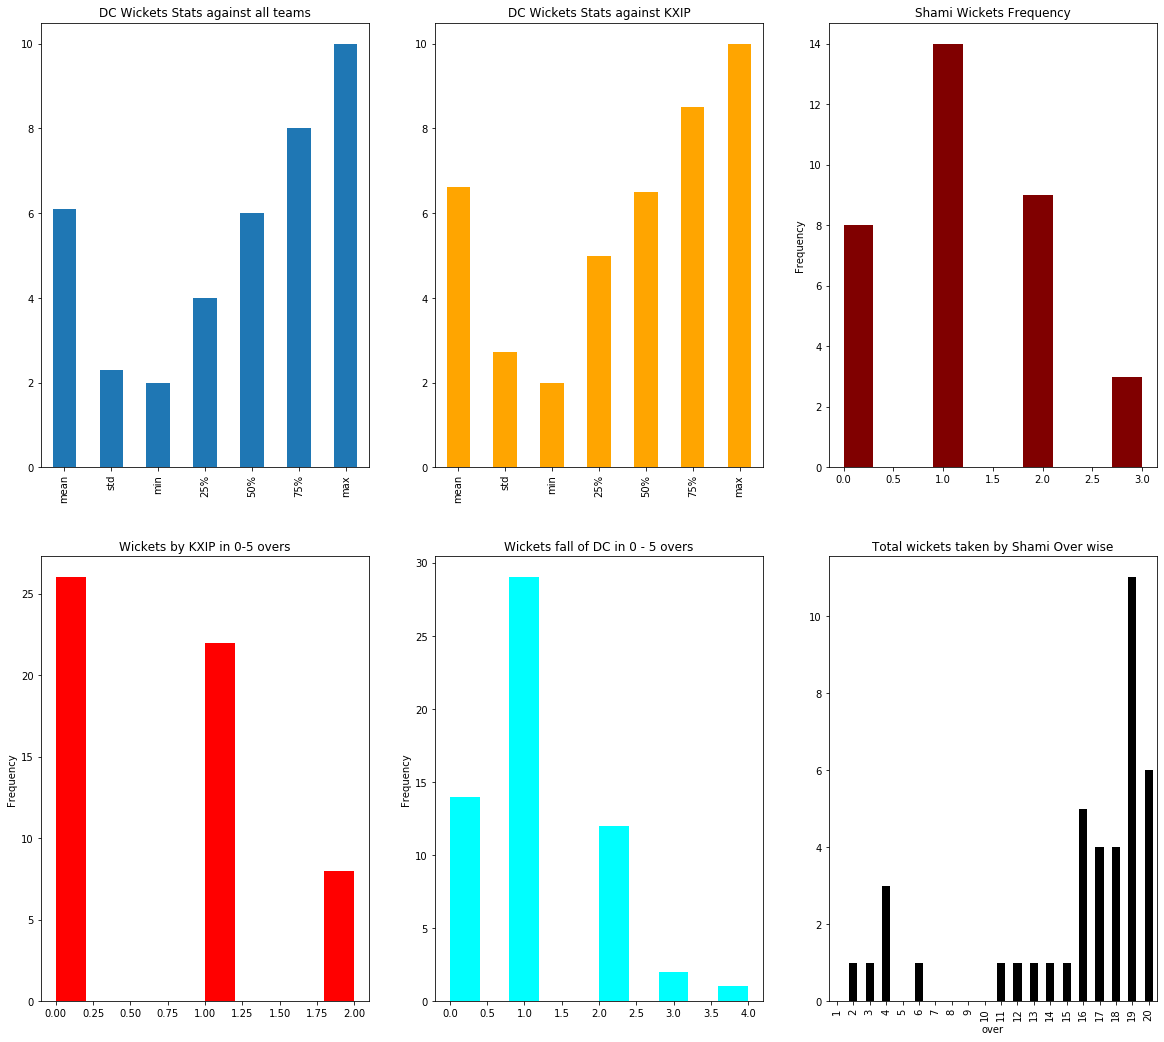

In [23]:
fig, ax =  plt.subplots(2,3, figsize=(20,18))
delivery[(delivery['batting_team']==team_2)].groupby('match_id').sum()['player_dismissed'].describe()[1:].plot(ax=ax[0, 0], kind='bar')
delivery[(delivery['batting_team']==team_2) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['player_dismissed'].describe()[1:].plot(ax=ax[0, 1], kind='bar', color='orange')
delivery[(delivery['bowler']=='Mohammed Shami')].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[0, 2], kind='hist', color='maroon')
delivery[(delivery['bowling_team']==team_1) & (delivery['over']<5)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[1, 0], kind='hist', color='red')
delivery[(delivery['batting_team']==team_2) & (delivery['over']<5)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[1, 1], kind='hist', color='cyan')
delivery[(delivery['bowler']=='Mohammed Shami')].groupby('over').sum()['player_dismissed'].plot(ax=ax[1, 2], kind='bar', color='black')
ax[0, 0].set_title('DC Wickets Stats against all teams')
ax[0, 1].set_title('DC Wickets Stats against KXIP')
ax[0, 2].set_title('Shami Wickets Frequency')
ax[1, 0].set_title('Wickets by KXIP in 0-5 overs')
ax[1, 1].set_title('Wickets fall of DC in 0 - 5 overs')
ax[1, 2].set_title('Total wickets taken by Shami Over wise')

- First and second plot suggests that mean wickets fall of DC is 6. 
- Third plot suggests that Shami generally takes 1 wicket.
- Forth plot suggests that Wickets taken by KXIP in 0-5 overs is generally 0 or 1.
- Fifth plot suggest that general Wickets fall of DC 0-5 overs is 1.
- Sixth plot suggests that Shami has taken maximum wickets during death overs.

So, this suggest that, there is a chance of 5 wicket falls during 5th to 20th over. In which, atleast 1 wicket will be taken by Shami, and 4 wickets taken by other bowlers. 

# Gayle batting

In [16]:
k11p_bowler_squad = ['CJ Jordan', 'A Singh', 'Mohammed Shami', 'K Gowtham', 'Mandeep Singh', 'GJ Maxwell']

In [17]:
gayle_pp = delivery[(delivery['batsman']=='CH Gayle') & (delivery['over']<=6)]
gayle = delivery[(delivery['batsman']=='CH Gayle') & (delivery['over']>6)]

for g in [gayle_pp, gayle]:
    strike_rate_g = list()
    match_ids_g = list()
    balls_faced_g = list()
    bat_runs_g = list()
    for match_id in g.match_id.unique():
        balls = 0
        runs = 0
        for run in g[g['match_id']==match_id]['batsman_runs']:
            balls += 1 
            runs += run
        if (runs*100/balls) < 250:
            balls_faced_g.append(balls)
            bat_runs_g.append(runs)
            match_ids_g.append(match_id)    
            strike_rate_g.append(runs*100/balls)
    if g is gayle_pp:
        gayle_sr_pp = pd.DataFrame(index=match_ids_g, data={'Strike Rate':strike_rate_g, 'Runs Scored':bat_runs_g,'Balls Played': balls_faced_g})      
    else:
        gayle_sr = pd.DataFrame(index=match_ids_g, data={'Strike Rate':strike_rate_g, 'Runs Scored':bat_runs_g,'Balls Played': balls_faced_g})    
        



In [18]:
fast_bowlers = ['AD Russell', 'AJ Tye', 'B Kumar', 'BA Stokes',
       'BCJ Cutting', 'Basil Thampi', 'CH Morris', 'CR Woakes', 
       'DS Kulkarni', 'HH Pandya',  'J Archer',
       'J Behrendorff', 'K Ahmed', 'KH Pandya', 'L Ngidi', 'M Morkel',
       'MJ McClenaghan', 'S Nadeem',
       'S Warrier', 'SR Watson', 'Sandeep Sharma', 'TG Southee',
       'UT Yadav', 'Z Khan']
spinners = ['AR Patel', 'SP Narine', 'Rashid Khan', 'S Lamichhane','Harbhajan Singh','DJ Hooda']
galye_dismissed = delivery[(delivery['batsman']=='CH Gayle') & (delivery['player_dismissed']==1)].copy()
galye_dismissed['Bowler Type'] = galye_dismissed['bowler'].apply(lambda x: 'Fast' if x in fast_bowlers else 'Spin')

Text(0.5, 1.0, 'Gayle Wicket vs Type of Bowlers')

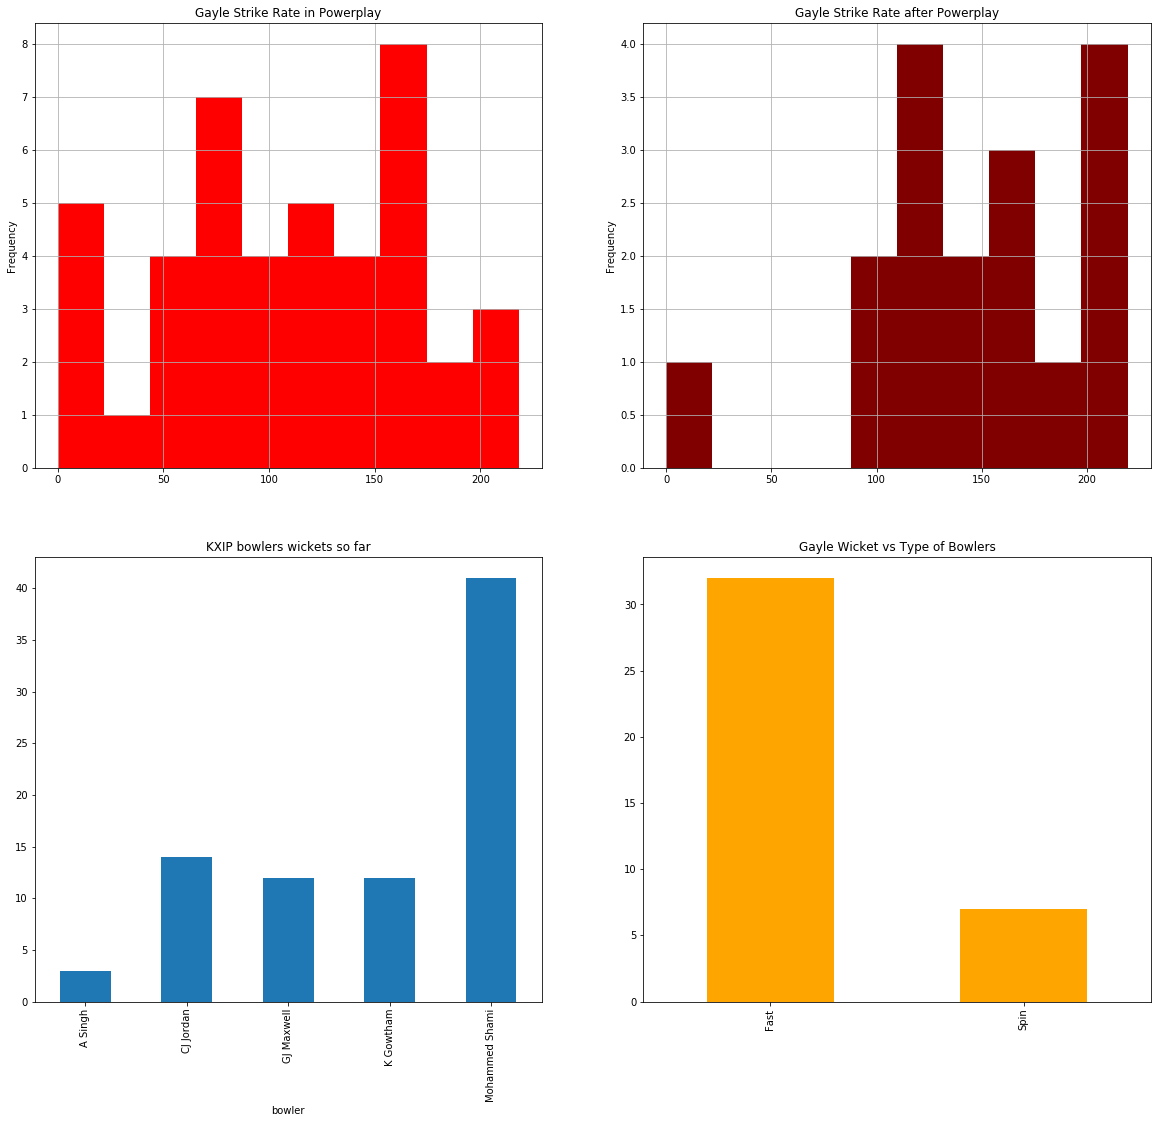

In [19]:
fig, ax =  plt.subplots(2,2, figsize=(20,18))
gayle_sr_pp['Strike Rate'].plot(ax=ax[0, 0], kind='hist', color='red', grid=True)
gayle_sr['Strike Rate'].plot(ax=ax[0, 1], kind='hist', color='maroon', grid=True)
delivery[(delivery['bowler'].isin(k11p_bowler_squad)) & (delivery['player_dismissed']==1)].groupby('bowler').sum()['player_dismissed'].plot(ax=ax[1, 0], kind='bar')
galye_dismissed['Bowler Type'].value_counts().plot(ax=ax[1, 1], kind='bar', color='orange')
ax[0, 0].set_title("Gayle Strike Rate in Powerplay")
ax[0, 1].set_title("Gayle Strike Rate after Powerplay")
ax[1, 0].set_title("KXIP bowlers wickets so far")
ax[1, 1].set_title("Gayle Wicket vs Type of Bowlers")

- First plot suggests that Gayle strike rate in powerplay is generally around 150.
- Second plot suggests that Gayle strike rate in overs 5 to 20 is around or greater than 130.
- Third plot suggests that KXIP has fast bowlers majority and the wickets taken by them so far is high.
- Fourth plot suggests that Gayle is dismissed majority times by Fast bowlers. 

First and second plot suggest that Gayle strike rate will be greater than 130.
Third and fourth plot suggests that Gayle dismissal chances are high so his status will be out. 

# Summary

- Total runs scored by both the teams independently showed that both the teams average run-scoring are same, so considering recent performance, the winning chances of DC was estimated high. 
- KL Rahul strike rate in the powerplay for every match was calculated, the mean value of strike rate is generally the common value of strike rate for Rahul. 
- Iyer's contribution to DC score for every match was calculated. Since the match is played in Dubai Cricket Stadium where pitch favours both bowlers and batsman, the chances of Iyer coming to play is high, and hitting above decent score is also high. So, the contribution can be more than the mean contribution.
- Shami average wickets taken was calculated, in different overs, his dismissal rate was calculated, both teams average wicket taken and fall was calculated for 4th question.
- Gayle's dismissal by bowler type, average strike rate, KXIP bowlers wickets graph, all these factors suggested high chance of Gayle dismissal and SR above 130.